# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор: Григорьев Константин
- Дата: 18.04.2025

## Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

Этот проект состоит из нескольких частей. 

Сначала вы поработаете с данными сервиса Яндекс Книги, рассчитаете несколько метрик и проверите гипотезу. Затем, уже на других данных, вы будете анализировать результаты A/B-тестирования.

В этом и следующих трёх уроках вы будете работать с данными о чтении и прослушивании контента в сервисе Яндекс Книги. Вам предстоит рассчитать несколько метрик с помощью SQL и интерпретировать полученные результаты. Затем вы проверите гипотезу с помощью Python и составите аналитическую записку.


## Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

- Таблица `bookmate.audition` содержит данные об активности пользователей и состоит из следующих полей:
 - `audition_id` — уникальный идентификатор сессии чтения или прослушивания;
 - `puid` — идентификатор пользователя;
 - `usage_platform_ru` — название платформы, с помощью которой пользователь слушал контент;
 - `msk_business_dt_str` — дата события в формате строки (московское время);
 - `app_version` — версия приложения, которая использовалась для чтения или прослушивания;
 - `adult_content_flg` — был ли это контент для взрослых: True или False;
 - `hours` — длительность чтения или прослушивания в часах;
 - `hours_sessions_long` — продолжительность длинных сессий чтения или прослушивания в часах;
 - `kids_content_flg` — был ли это детский контент: True или False;
 - `main_content_id` — идентификатор основного контента;
 - `usage_geo_id` — идентификатор географического местоположения.
- Таблица `bookmate.content` содержит данные о контенте и состоит из следующих полей:
 - `main_content_id` — идентификатор основного контента;
 - `main_author_id` — идентификатор основного автора контента;
 - `main_content_type` — тип контента;
 - `main_content_name` — название контента;
 - `main_content_duration_hours` — длительность контента в часах;
 - `published_topic_title_list` — список жанров контента.
- Таблица `bookmate.author` содержит данные об авторах контента и состоит из следующих полей:
 - `main_author_id` — идентификатор основного автора контента;
 - `main_author_name` — имя основного автора контента.
- Таблица `bookmate.geo` содержит данные о местоположении и состоит из следующих полей:
 - `usage_geo_id` — идентификатор географического положения;
 - `usage_geo_id_name` — город или регион географического положения;
 - `usage_country_name` — страна географического положения.

## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---
  - Часть 1. Проверка гипотезы в Python и составление аналитической записки
1. Загрузка данных и знакомство с ними
2. Проверка гипотезы в Python
3. Аналитическая записка
  - Часть 2. Анализ результатов A/B-тестирования
1. Опишите цели исследования.
2. Загрузите данные, оцените их целостность.
3. По таблице ab_test_participants оцените корректность проведения теста
4. Проведите оценку результатов A/B-тестирования:

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
#Импортируем библиотеки
# Загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest


In [4]:
#Читаем файл и выбираем только нужные колонки
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv', 
                 usecols=['puid', 'city', 'hours'])

In [5]:
df.head()

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [6]:
df.shape[0]

8784

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


Датасет содержит 8784 строк и 3 столбца. Столбцы имеют корректный тип данных.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [8]:
# Проверка на дубликаты
duplicate_counts = df['puid'].duplicated().sum()

# Статистика по городам
city_stats = df.groupby('city')['hours'].describe()

print('Количество дубликатов:', duplicate_counts)
print('Статистика по городам:')
display(city_stats)


Количество дубликатов: 244
Статистика по городам:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Москва,6234.0,10.881092,36.851683,0.000018,0.059903,0.924498,5.939972,857.209373
Санкт-Петербург,2550.0,11.592691,39.704993,0.000025,0.080002,0.984781,6.509072,978.764775


В датасете содержится 244 дублирующих строки по уникальному индентификатору пользователя.

In [9]:
df_new = df.drop_duplicates(subset='puid', keep='first')


In [10]:
df_new.shape[0]

8540

In [11]:
df_new.head()

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8540 non-null   object 
 1   puid    8540 non-null   int64  
 2   hours   8540 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.9+ KB


Количество уникальных пользователей в группе для СПБ: 2306
Количество уникальных пользователей в группе для МСК: 6234
Процентная разница между группами СПБ и МСК: -170.34%


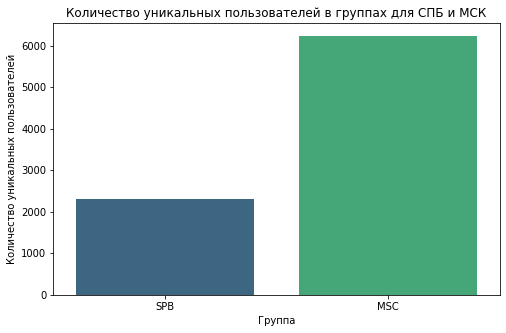

In [13]:
# Получаем количество уникальных пользователей в группах A и B
unique_users_spb = df_new[df_new['city'] == 'Санкт-Петербург']['puid'].nunique()
unique_users_msc = df_new[df_new['city'] == 'Москва']['puid'].nunique()
percentage_difference = 100 * ((unique_users_spb-unique_users_msc)/unique_users_spb)

print(f"Количество уникальных пользователей в группе для СПБ: {unique_users_spb}")
print(f"Количество уникальных пользователей в группе для МСК: {unique_users_msc}")
print(f"Процентная разница между группами СПБ и МСК: {percentage_difference:.2f}%")

results_df = pd.DataFrame({
    'test_group': ['SPB', 'MSC'],
    'Unique Users': [unique_users_spb, unique_users_msc]
})

# Визуализируем данные
plt.figure(figsize=(8, 5))
sns.barplot(x='test_group', y='Unique Users', data=results_df, palette='viridis')
plt.title('Количество уникальных пользователей в группах для СПБ и МСК')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Группа')
plt.show()


Процентная разница между двумя группами составила -144,47%. 

Можно сделать вывод, что кол-во уникальных пользователей в Москве гораздо больше чем в Санкт-Петербурге. Распределеине пользователей не должно повлиять на результаты теста, но чтобы убедиться, дополнительно построим гистограмы распределения общего кол-ва часов для каждой группы.

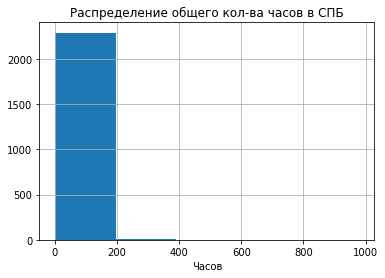

In [14]:

df_new[df_new['city'] == 'Санкт-Петербург']['hours'].hist(bins=5)

plt.title('Распределение общего кол-ва часов в СПБ')

plt.xlabel('Часов')

plt.show()

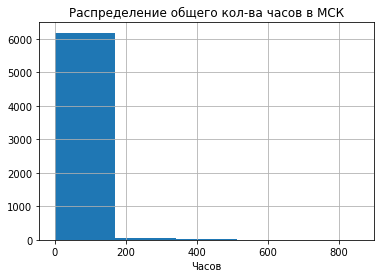

In [15]:

df_new[df_new['city'] == 'Москва']['hours'].hist(bins=5)

plt.title('Распределение общего кол-ва часов в МСК')

plt.xlabel('Часов')

plt.show()

По гистограммам распределения часов, можно сделать вывод, что общее кол-во часов распределено почти одинаково, для СПБ и МСК.

In [16]:

group_spb = df[df['city'] == 'Санкт-Петербург']['hours']

group_msc = df[df['city'] == 'Москва']['hours']

alpha = 0.05

results = st.ttest_ind(
    group_spb, 
    group_msc,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.21101894136116772
Не получилось отвергнуть нулевую гипотезу


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Для проверки гипотезы был выбран односторонний t-тест для двух независимых выборок. Нулевая гипотеза (H₀) предполагает, что средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается, в то время как альтернативная гипотеза (H₁) утверждает, что средняя активность пользователей из Санкт-Петербурга больше, чем у пользователей из Москвы.

Уровень статистической значимости (alpha) был установлен на уровне 0.05.

По результатам проведенного t-теста было получено p-value, которое составило: 0.338193679651558

На основании полученного p-value, можно сделать следующие выводы: 

P-value больше alpha, нельзя отвергнуть нулевую гипотезу. Это значит что нет статистически значимых доказательств того, что средняя активность пользователей из Санкт-Петербурга превосходит активность пользователей из Москвы.

Возможные причины:
Возможно из-за одинкового ритма жизни, свободного кол-ва времени и типа работы в этих двух городах, можно говорить о том что, средняя активность пользователей не отличается.

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



- Оценка корректности проведения A/B-теста;
- Анализ результатов теста;
- Поддержка принятия решений о масштабировании.

Таким образом, основная цель исследования состоит в том, чтобы оценить эффективность нового интерфейса с точки зрения статистических показателей и пользовательского опыта, а также выработать рекомендации, способствующие улучшению результатов интернет-магазина.

## 2. Загрузите данные, оцените их целостность.


In [17]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [18]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


В таблице `participants` содержится 14525 строк и 4 столбца. Столбцы имеют верный тип данных.

In [19]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


В таблице `events` содержится 787286 строк и 4 столбца. Столбцы имеют верный тип данных. Но в столбце `details` есть пропуски.

In [20]:
df_null = participants.isna().sum().sum()
df_duplicates = participants.duplicated().sum()
df_duplicates_user = participants['user_id'].duplicated().sum()

print(df_null, df_duplicates, df_duplicates_user)

0 0 887


В таблице `participants` нет полных дубликатов, но есть неявные дубликаты по столбцу `user_id`.

In [21]:
df_null = events.isna().sum().sum()
df_duplicates = events.duplicated().sum()
df_duplicates_user = events['user_id'].duplicated().sum()

print(df_null, df_duplicates, df_duplicates_user)

538264 36318 643102


В таблице `events` 538264 пропусков, 36318 дубликатов полных и 643102 дубликатов по полю `user_id`.

In [22]:
events = events.drop_duplicates()

In [23]:
participants = participants.drop_duplicates(subset='user_id', keep='first', inplace=False)

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [24]:
# выгрузим в датасет информацию о пользователях участвующих в AB тесте 
df_interface_eu_test = participants.loc[(participants['ab_test'] == 'interface_eu_test')]

In [25]:
df_interface_eu_test.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android


In [26]:
df_interface_eu_test.shape[0]

10403

Всего датасет содержит 10,850 строк.

Количество уникальных пользователей в группе A: 5174
Количество уникальных пользователей в группе B: 5229
Процентная разница между группами A и B: -1.06%


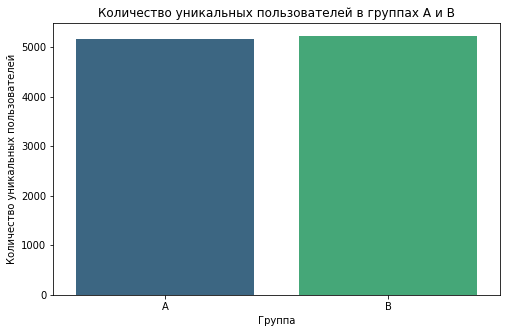

In [27]:

unique_users_A = df_interface_eu_test[df_interface_eu_test['group'] == 'A']['user_id'].nunique()
unique_users_B = df_interface_eu_test[df_interface_eu_test['group'] == 'B']['user_id'].nunique()
percentage_difference = 100 * ((unique_users_A-unique_users_B)/unique_users_A)

print(f"Количество уникальных пользователей в группе A: {unique_users_A}")
print(f"Количество уникальных пользователей в группе B: {unique_users_B}")
print(f"Процентная разница между группами A и B: {percentage_difference:.2f}%")

# Шаг 4: Визуализация
# Создаем DataFrame для визуализации
results_df = pd.DataFrame({
    'test_group': ['A', 'B'],
    'Unique Users': [unique_users_A, unique_users_B]
})

# Визуализируем данные
plt.figure(figsize=(8, 5))
sns.barplot(x='test_group', y='Unique Users', data=results_df, palette='viridis')
plt.title('Количество уникальных пользователей в группах A и B')
plt.ylabel('Количество уникальных пользователей')
plt.xlabel('Группа')
plt.show()


Кол-во уникальных пользователей в двух группах почти одинаково и разница небольшая, в 1,56%. Что допустимо в рамках AB теста.

In [28]:
A_group = df_interface_eu_test[df_interface_eu_test['group'] == 'A']['user_id']
B_group = df_interface_eu_test[df_interface_eu_test['group'] == 'B']['user_id']

intersection = list(set(B_group) & set(A_group))
print(intersection) 

[]


Пересечений по пользователям не обнаружено.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [29]:
# объединим данный из таблицы event с данными об AB тесте, будем присоединять к events, чтобы сохранить данные из левой таблицы
result_isin = pd.merge(events, df_interface_eu_test, on='user_id')

In [30]:
result_isin

,user_id,event_dt,event_name,details,group,ab_test,device
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone
...,...,...,...,...,...,...,...
70725,16CCB1C8C4DCF1AF,2020-12-23 23:50:29,registration,0.0,A,interface_eu_test,Mac
70726,16CCB1C8C4DCF1AF,2020-12-23 23:55:52,login,NaN,A,interface_eu_test,Mac
70727,2DDC948BD76ABC57,2020-12-24 21:57:10,registration,-4.29,B,interface_eu_test,iPhone
70728,2DDC948BD76ABC57,2020-12-24 21:58:49,login,NaN,B,interface_eu_test,iPhone


Итого получилось 79715 строк с данными о пользователях AB теста.

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [31]:
# из полученого датасета отберем дату регистрации для пользователей, чтобы для каждого пользователя добавить дату рег. в след. датасет
reg_data = result_isin[result_isin['event_name'] == 'registration'][['user_id','event_dt']]

In [32]:
# объединим данные
df_done = pd.merge(result_isin, reg_data, on='user_id', how='left')

In [33]:
# находим кол-во дней между регистрацией
df_done['lt'] = (df_done['event_dt_x'] - df_done['event_dt_y']).dt.days

In [34]:
# отбираем данные, гте lifetime меньше 7 дней 
df_done_new = df_done.loc[df_done['lt'] < 7]

In [35]:
df_done_new

,user_id,event_dt_x,event_name,details,group,ab_test,device,event_dt_y,lt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2
...,...,...,...,...,...,...,...,...,...
70725,16CCB1C8C4DCF1AF,2020-12-23 23:50:29,registration,0.0,A,interface_eu_test,Mac,2020-12-23 23:50:29,0
70726,16CCB1C8C4DCF1AF,2020-12-23 23:55:52,login,NaN,A,interface_eu_test,Mac,2020-12-23 23:50:29,0
70727,2DDC948BD76ABC57,2020-12-24 21:57:10,registration,-4.29,B,interface_eu_test,iPhone,2020-12-24 21:57:10,0
70728,2DDC948BD76ABC57,2020-12-24 21:58:49,login,NaN,B,interface_eu_test,iPhone,2020-12-24 21:57:10,0


Готово, в итоговой выборке 68949 строк с информацией об пользователей, участвующих в AB тесте, отфильтрованного по lifetime меньше 7.

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [36]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size=mde,
    power=power,
    alpha=alpha,
    ratio=1  # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")
print(f"Общий размер необходимой выборки: {int(sample_size)*2}")
print(f"Общий размер выборки: {df_done_new.shape[0]}")

Необходимый размер выборки для каждой группы: 17441
Общий размер необходимой выборки: 34882
Общий размер выборки: 60980


Кол-ва выборки хватает для корректного проведения AB теста.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [37]:
poc = df_done_new[df_done_new['event_name'] == 'purchase']

In [38]:
ab_purchase = poc.groupby('group')['user_id'].nunique()

In [39]:
ab_total_users = df_done_new.groupby('group')['user_id'].nunique()

In [40]:
print(f"В группе A совершили покупку: {ab_purchase['A']} из {ab_total_users['A']} пользователей, что составило {round((ab_purchase['A']/ab_total_users['A'])*100, 2)}%.")
print(f"В группе B совершили покупку: {ab_purchase['B']} из {ab_total_users['B']} пользователей, что составило {round((ab_purchase['B']/ab_total_users['B'])*100, 2)}%.")

В группе A совершили покупку: 1427 из 5174 пользователей, что составило 27.58%.
В группе B совершили покупку: 1532 из 5229 пользователей, что составило 29.3%.


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Исходя из представленных данных, можно предварительно сделать вывод, что в группе B по крайней мере на 7,6% активных пользоватеелй стало больше.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Нулевая гипотеза (H0): Конверсия не изменилась (конверсия до изменений равна конверсии после изменений).

Альтернативная гипотеза (H1): Конверсия изменилась (конверсия до изменений не равна конверсии после изменений).

In [41]:

# Считаем размер группы A
n_a = ab_total_users['A']

# Считаем размер группы B
n_b = ab_total_users['B']

# Считаем количество успехов в группе A
m_a = ab_purchase['A']

# Считаем количество успехов в группе B
m_b = ab_purchase['B']

# Доли успехов
p_a = m_a / n_a if n_a > 0 else 0
p_b = m_b / n_b if n_b > 0 else 0

# Проверка предпосылки о достаточном количестве данных
if n_a >= 30 and n_b >= 30 and m_a >= 5 and m_b >= 5:
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

alpha = 0.05  # Уровень значимости

# Проведение Z-теста пропорций
stat_ztest, p_value_ztest = proportions_ztest([m_b, m_a], [n_b, n_a], alternative='larger')

print(f'pvalue={p_value_ztest}')  # Вывод p-value

if p_value_ztest > alpha:
    print('Нулевая гипотеза находит подтверждение!')
else:
    print('Нулевая гипотеза не находит подтверждения!')


Предпосылка о достаточном количестве данных выполняется!
pvalue=0.026072886604683897
Нулевая гипотеза не находит подтверждения!


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

AB тестирование проведено корректно, выборка соответсвует действительности и проведенным рассчетам. Пересечений между группами не найдено. По проведенной проверке можно сделать вывод, что конверсия действительно изменилась в положительную сторону.